# Apple Quality Dataset

Task - Given different feature in dataset predict the Quality of Apple. It's a categorical Problem.

## steps -

- [Installation](#installation)
- [cleanup](#Dataset_cleanup)
- [EDA](#EDA)
- [Feature_selection](#Feature_selection)
- [feature_extraction](#Feature_extraction)
- [model_selection](#Model_selection)

## Installation

- IMPORT ALL REQUIRED LIBRARIES


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn import feature_selection
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

import template


- READ FILES USING PANDAS PACKAGE

In [3]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir,"Datasets","apple_quality.csv")
data = pd.read_csv(data_dir)

# Dataset_cleanup

In [4]:
data.head()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good

In [5]:
data.describe()

A_id         Size       Weight    Sweetness  Crunchiness  \
count  4000.000000  4000.000000  4000.000000  4000.000000  4000.000000   
mean   1999.500000    -0.503015    -0.989547    -0.470479     0.985478   
std    1154.844867     1.928059     1.602507     1.943441     1.402757   
min       0.000000    -7.151703    -7.149848    -6.894485    -6.055058   
25%     999.750000    -1.816765    -2.011770    -1.738425     0.062764   
50%    1999.500000    -0.513703    -0.984736    -0.504758     0.998249   
75%    2999.250000     0.805526     0.030976     0.801922     1.894234   
max    3999.000000     6.406367     5.790714     6.374916     7.619852   

         Juiciness     Ripeness  
count  4000.000000  4000.000000  
mean      0.512118     0.498277  
std       1.930286     1.874427  
min      -5.961897    -5.864599  
25%      -0.801286    -0.771677  
50%       0.534219     0.503445  
75%       1.835976     1.766212  
max       7.364403     7.237837

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [7]:
data.tail()
# now if you obseve at end there is string at end of the row 
# so remove it and rerun the above cell

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   
4000     NaN       NaN       NaN        NaN          NaN        NaN       NaN   

                                Acidity Quality  
3996                        1.854235285    good  
3997                       -1.334611391     bad  
3998                       -2.229719806    good  
3999                        1.599796456    good  
4000  Created_by_Nidula_Elgiriyewithana     NaN

In [8]:
data  = data.drop(data.index[-1])

As you can see that data typr mentioned here for **Acidity** is Object but its actually float so we need to conver it into float

In [9]:
data["Acidity"] = (data["Acidity"]).astype("float64")

In [10]:
data.tail()

A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
3995  3995.0  0.059386 -1.067408  -3.714549     0.473052   1.697986  2.244055   
3996  3996.0 -0.293118  1.949253  -0.204020    -0.640196   0.024523 -1.087900   
3997  3997.0 -2.634515 -2.138247  -2.440461     0.657223   2.199709  4.763859   
3998  3998.0 -4.008004 -1.779337   2.366397    -0.200329   2.161435  0.214488   
3999  3999.0  0.278540 -1.715505   0.121217    -1.154075   1.266677 -0.776571   

       Acidity Quality  
3995  0.137784     bad  
3996  1.854235    good  
3997 -1.334611     bad  
3998 -2.229720    good  
3999  1.599796    good

-Set **A_id** as index or remove it as it's not a feature

In [11]:
data.set_index("A_id",inplace=True)

using
- describe()
- info()<br>

to get information regarding each column , we can observe from above that there are no missing values in the data

Also there are no zeros in the data cause sometimes erp or iot systems or legacy systems assigned zeros to the data sample where its null

In [12]:
data_val = template.data_val(data)
column_types = data_val.get_column_type()
data_val.zero_count()

Column_name  Zeros
0         Size      0
1       Weight      0
2    Sweetness      0
3  Crunchiness      0
4    Juiciness      0
5     Ripeness      0
6      Acidity      0
7      Quality      0

In [13]:
schema = data_val.schema()
print(schema)

       columns    dtype
0         Size  float64
1       Weight  float64
2    Sweetness  float64
3  Crunchiness  float64
4    Juiciness  float64
5     Ripeness  float64
6      Acidity  float64
7      Quality   object


# EDA

In [14]:
sns.set_theme()

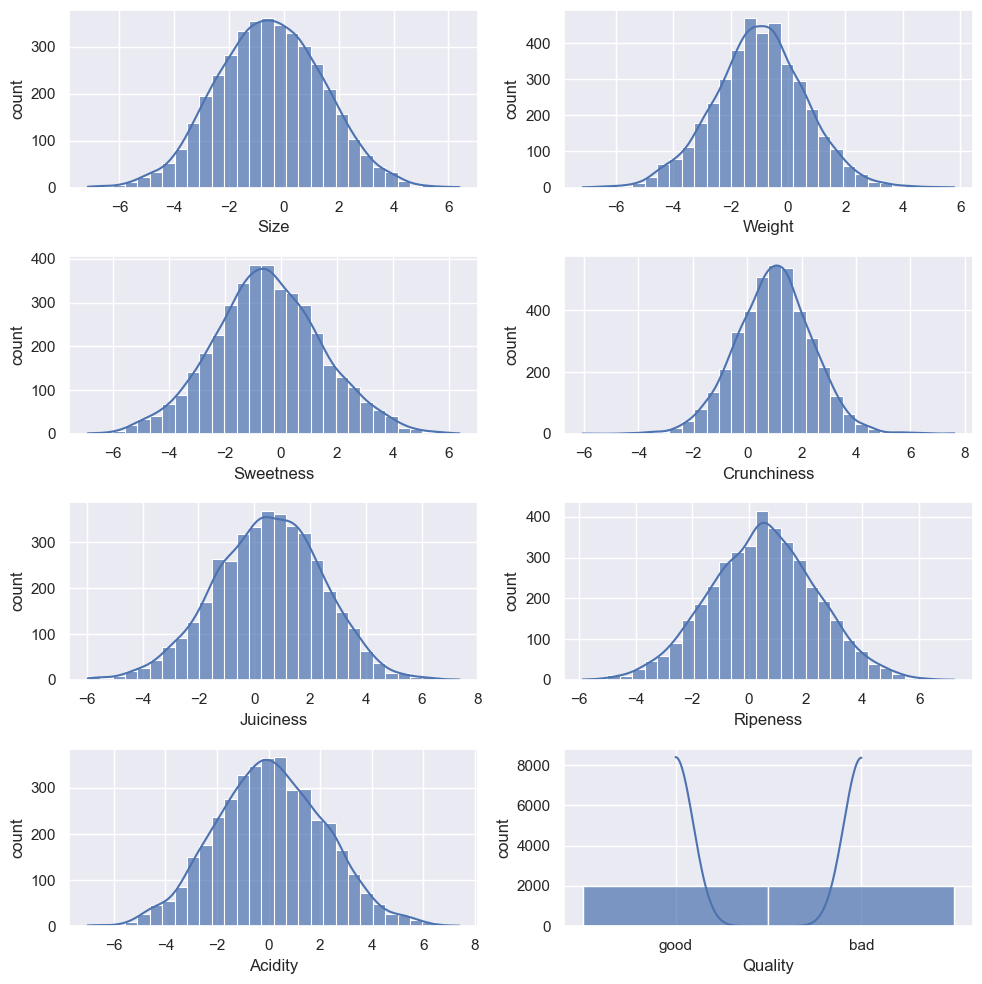

In [15]:
data_val.histplot_columns1(4,2,figuresize=(10,10))


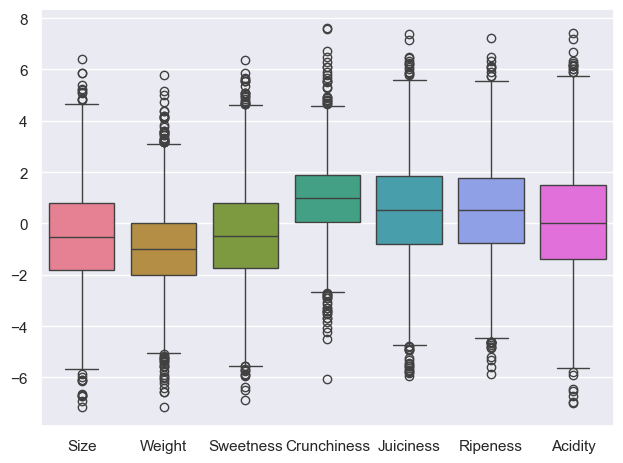

In [16]:
sns.boxplot(data=data)
plt.tight_layout()

In [17]:
for cat in pd.unique(data["Quality"]):
    print(f"{cat} =",(data["Quality"]==cat).sum())

good = 2004
bad = 1996


In [18]:
data_cleaned = data_val.remove_outliers()

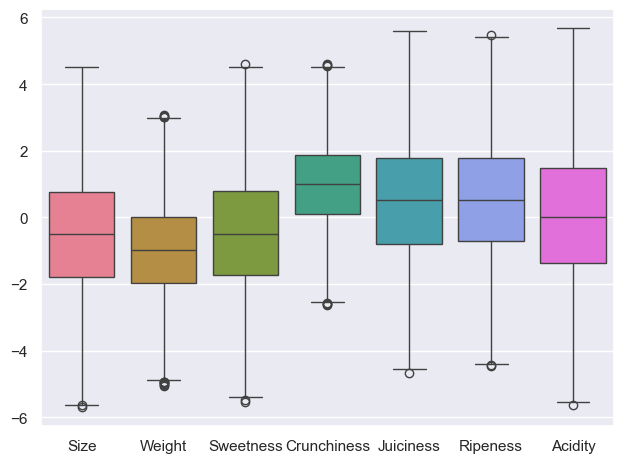

In [19]:
sns.boxplot(data_cleaned)
plt.tight_layout()

<Axes: >

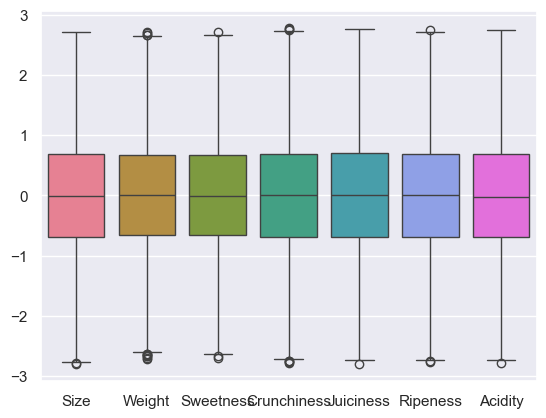

In [20]:
data_scaled = data_val.scale_dataset()
sns.boxplot(data_scaled)

<Axes: ylabel='Density'>

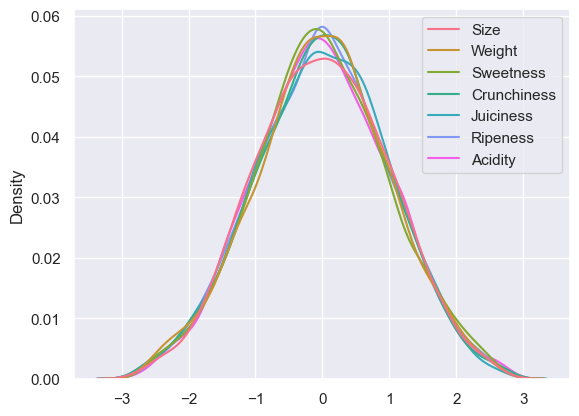

In [21]:
sns.kdeplot(data=(data_scaled),)

In [22]:
encoder = OneHotEncoder(drop="first")

In [23]:
for col,col_types in column_types.items():
    if col_types == "categorical":
        x= data[col].values.reshape(-1,1)
        encoder.fit(x)
        data[col]=encoder.transform(x).toarray()


In [24]:
for col,col_types in column_types.items():
    if col_types == "categorical":
        x= data_scaled[col].values.reshape(-1,1)
        encoder.fit(x)
        data_scaled[col]=encoder.transform(x).toarray()



In [25]:
data_scaled.head()

Size    Weight Sweetness Crunchiness Juiciness  Ripeness   Acidity  \
0 -0.370211 -1.237258  2.213532    0.464509  0.191007  0.189197 -0.382362   
1  0.118011 -0.243366 -0.673125    -1.02403  1.264848 -0.313741  1.252215   
2 -0.079383  -0.85811  0.963659   -0.835353  1.697194 -2.188577  0.357367   
3  1.013295 -0.206849  0.050222   -1.186224  1.368826 -1.016759  0.216248   
4 -1.575739 -0.281973 -0.766674   -1.188359 -2.354578  0.770735 -1.486294   

   Quality  
0      1.0  
1      0.0  
2      1.0  
3      1.0  
4      0.0

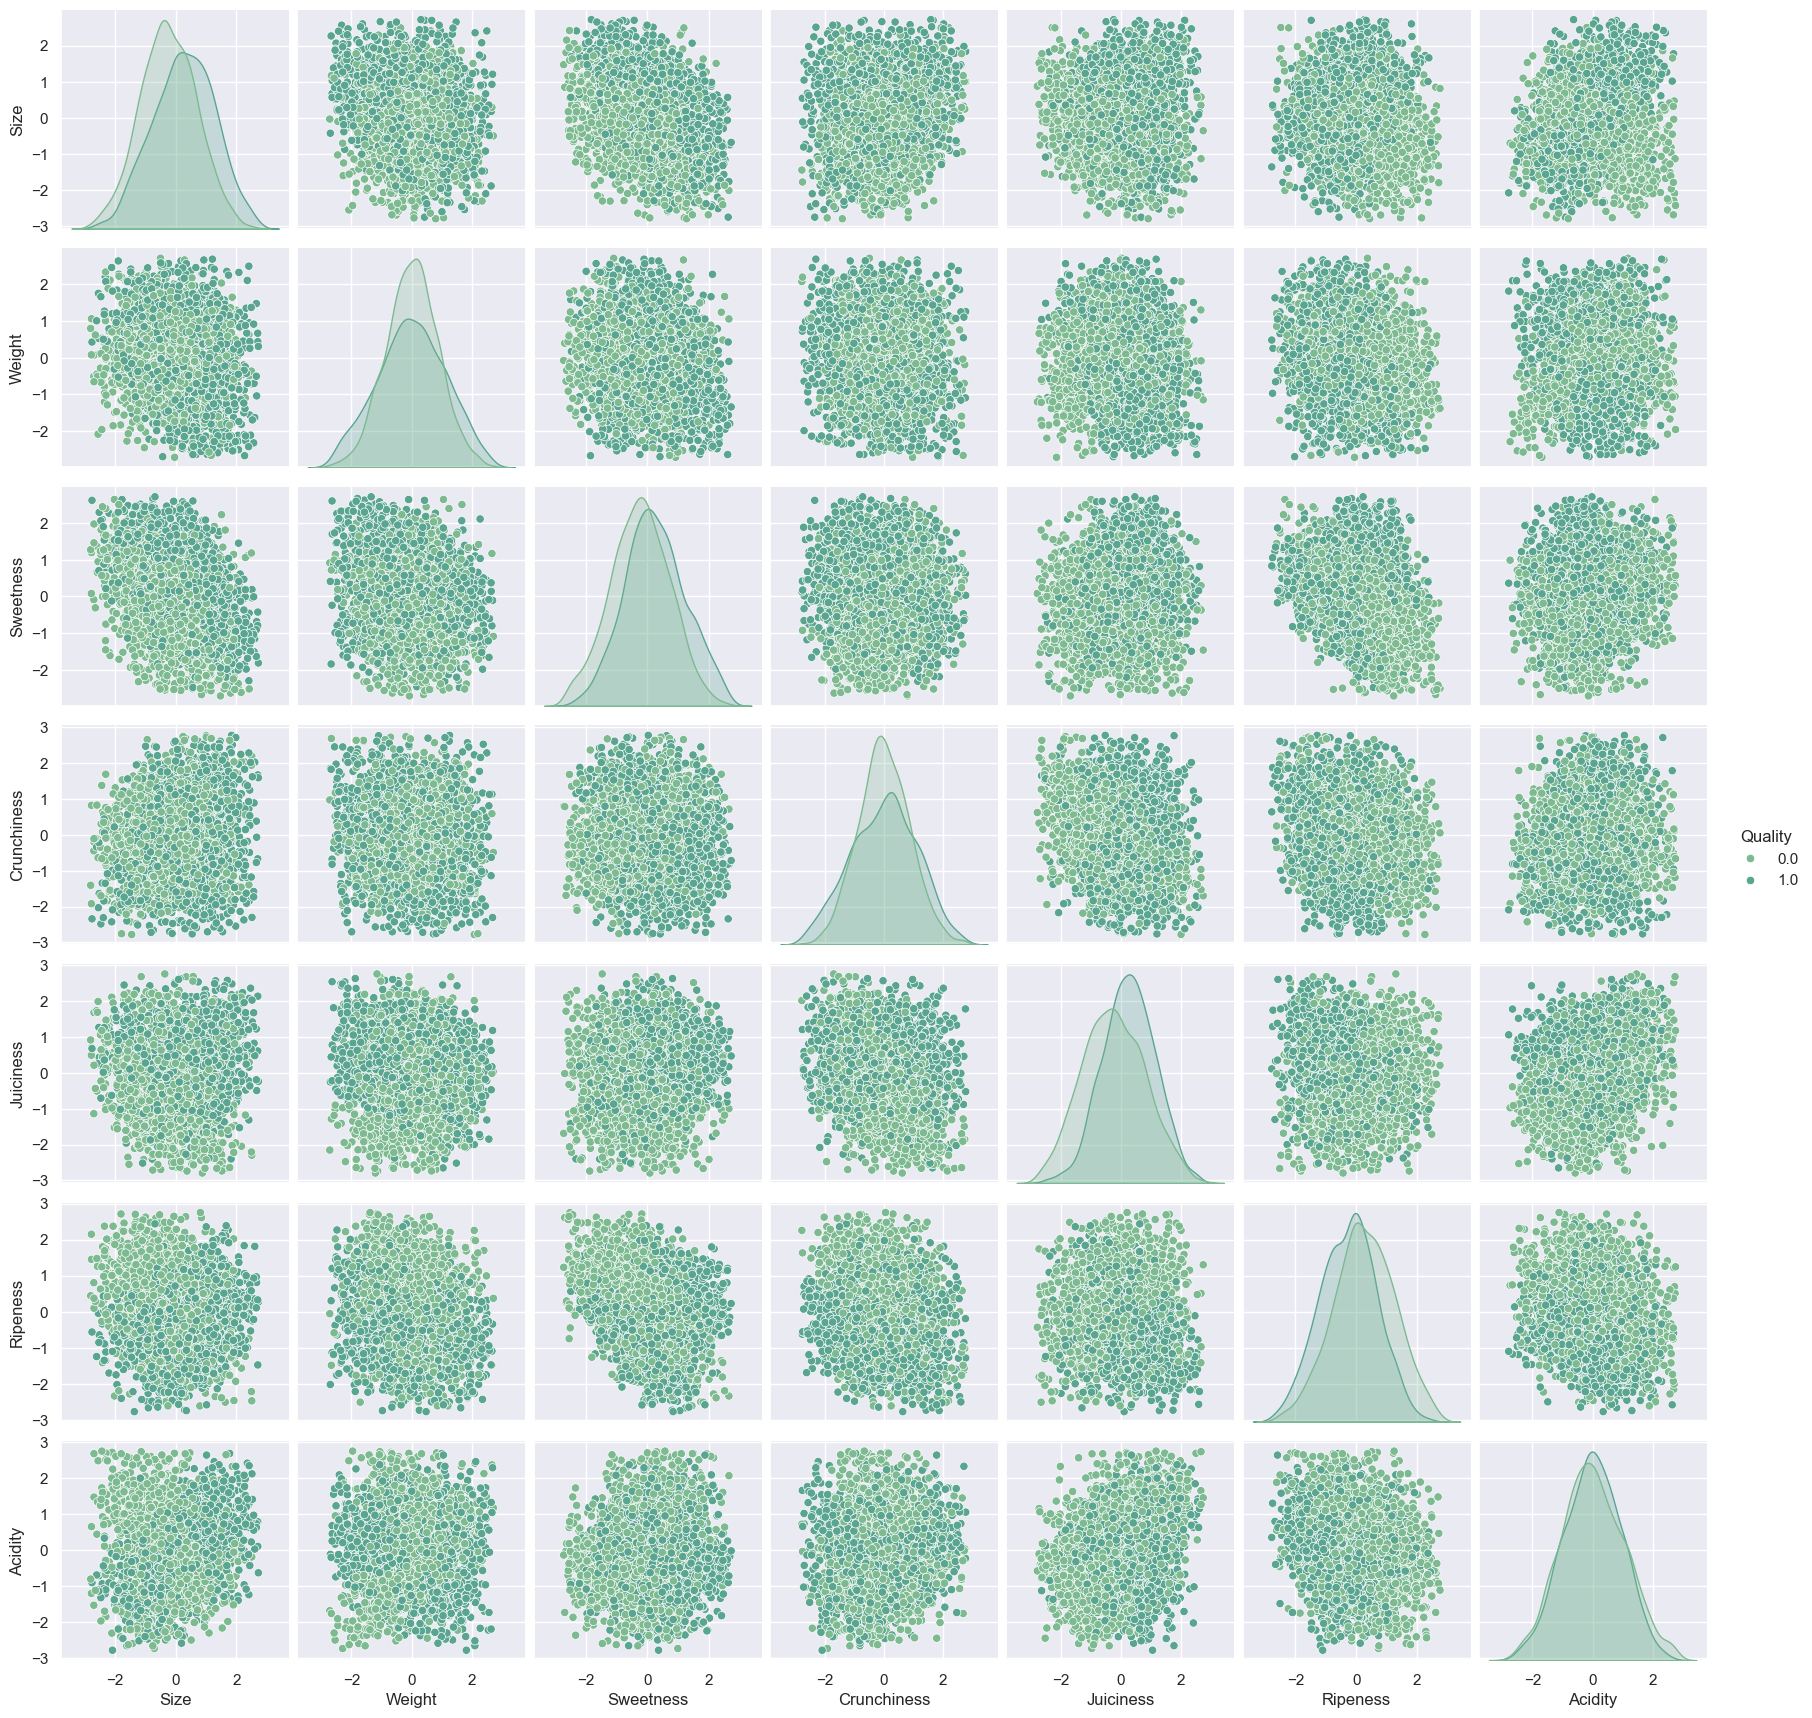

In [26]:
sns.diverging_palette(15,360,)
sns.pairplot(data_scaled,hue="Quality")

# Feature Selection

<Axes: >

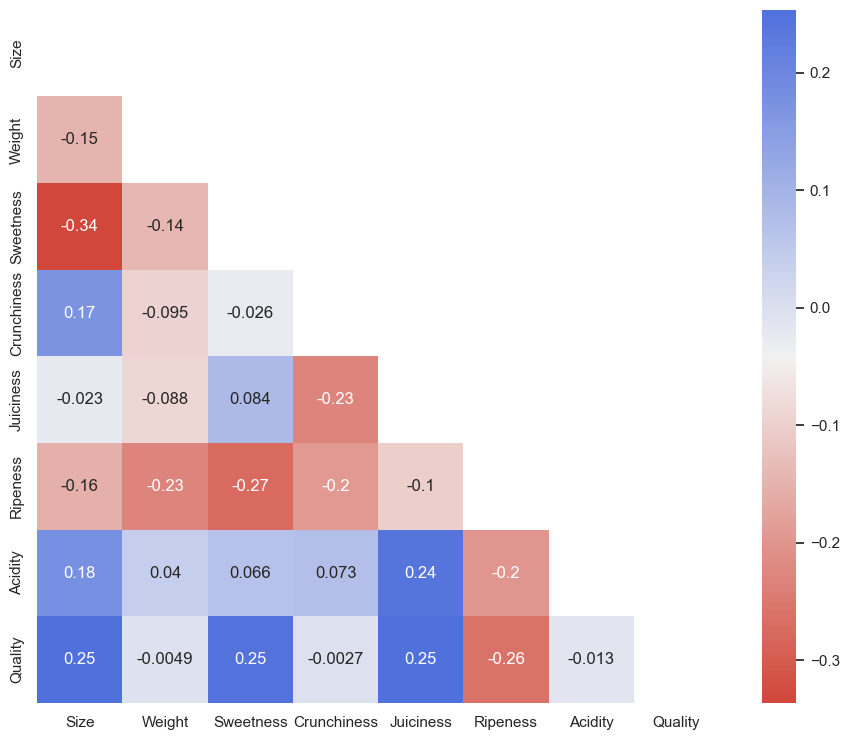

In [27]:
corrmap = data_scaled.corr()
sns.set_theme(style="white")
plt.figure(figsize=(11,9))
mask = np.triu(np.ones_like(corrmap, dtype=bool))
cmap = sns.diverging_palette(15,260, as_cmap=True)
sns.heatmap(corrmap,cmap=cmap,mask=mask,annot=True)


In [28]:
x = data_scaled[data_scaled.columns[:-1]]
y = data_scaled[data_scaled.columns[-1]]

In [29]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
y_train1.head()

3592    0.0
3291    0.0
3554    0.0
3654    1.0
108     1.0
Name: Quality, dtype: float64

In [31]:
x_train1.head()
print(x_train1.var(axis=0))

Size           0.999034
Weight         0.999962
Sweetness       0.99886
Crunchiness    1.020218
Juiciness       0.98986
Ripeness       0.998349
Acidity         1.00223
dtype: object


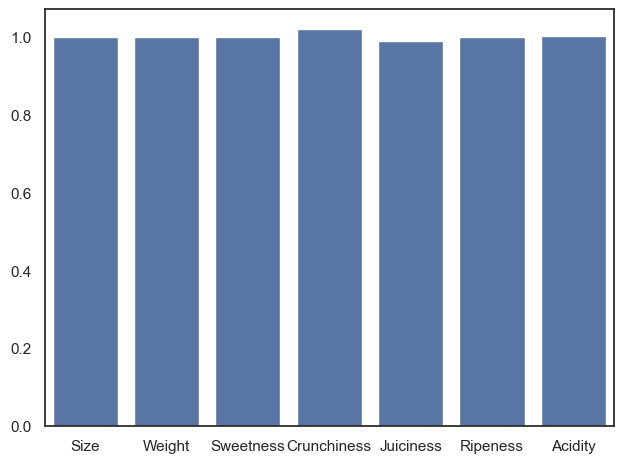

In [32]:
sns.barplot(x_train1.var(axis=0))
plt.tight_layout()

In [33]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

min_features_to_select = 1  # Minimum number of features to consider
clf = LogisticRegression()
cv = StratifiedKFold(5)

rfecv = RFECV(
    estimator=clf,
    step=1,
    cv=cv,
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
    n_jobs=2,
)
rfecv.fit(x_train1, y_train1)

print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 6


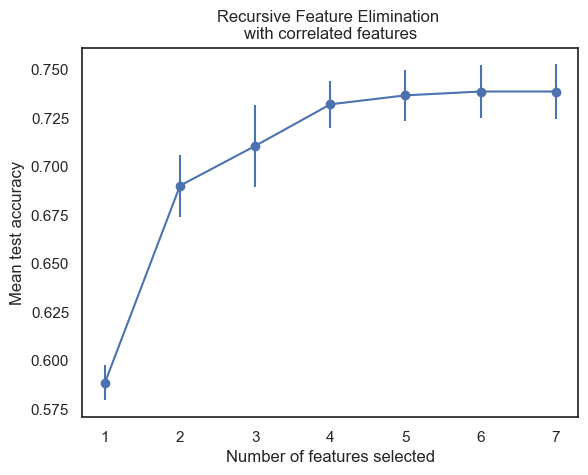

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming rfecv is your RFECV object
cv_results = pd.DataFrame(rfecv.cv_results_)

# Adding the n_features column
cv_results['n_features'] = range(1, len(cv_results) + 1)

# Plotting the results
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Mean test accuracy")
plt.errorbar(
    x=cv_results["n_features"],
    y=cv_results["mean_test_score"],
    yerr=cv_results["std_test_score"],
    fmt='-o'  # Add this for better visualization (line with circle markers)
)
plt.title("Recursive Feature Elimination \nwith correlated features")
plt.show()


In [35]:
import numpy as np

# Fit the model
rfecv.fit(x_train1, y_train1)

# Print the optimal number of features
print(f"Optimal number of features: {rfecv.n_features_}")

# Get the boolean mask indicating selected features
selected_features_mask = rfecv.support_

# If x_train1 is a DataFrame, get the column names
if hasattr(x_train1, 'columns'):
    selected_features = x_train1.columns[selected_features_mask]
else:
    selected_features = np.array(range(x_train1.shape[1]))[selected_features_mask]

# Print the selected features
print(f"Selected features: {selected_features}")


Optimal number of features: 6
Selected features: Index(['Size', 'Weight', 'Sweetness', 'Juiciness', 'Ripeness', 'Acidity'], dtype='object')


In [36]:
x_new = feature_selection.SelectKBest(feature_selection.f_classif,k=5).fit(x_train1,y_train1)

In [37]:
selected_feature = x_new.get_feature_names_out()


In [38]:
x_train2 = x_train1[selected_feature]
x_train2.head()

Size Sweetness Juiciness  Ripeness   Acidity
3592  0.223576 -0.920317 -0.751093 -0.079453 -0.373818
3291 -1.318071  1.030872 -0.373258  1.541042 -1.097315
3554  0.257221  1.645892 -0.112609 -0.455273 -0.710492
3654  0.506724   1.92997 -0.574376  1.110174 -0.516902
108  -1.351267 -0.047898  0.982728 -0.982538 -1.362124

In [39]:
y_train1.head()

3592    0.0
3291    0.0
3554    0.0
3654    1.0
108     1.0
Name: Quality, dtype: float64

In [40]:
data1 = pd.concat([x_train2, y_train1],axis=1)
data1.head()

Size Sweetness Juiciness  Ripeness   Acidity  Quality
3592  0.223576 -0.920317 -0.751093 -0.079453 -0.373818      0.0
3291 -1.318071  1.030872 -0.373258  1.541042 -1.097315      0.0
3554  0.257221  1.645892 -0.112609 -0.455273 -0.710492      0.0
3654  0.506724   1.92997 -0.574376  1.110174 -0.516902      1.0
108  -1.351267 -0.047898  0.982728 -0.982538 -1.362124      1.0

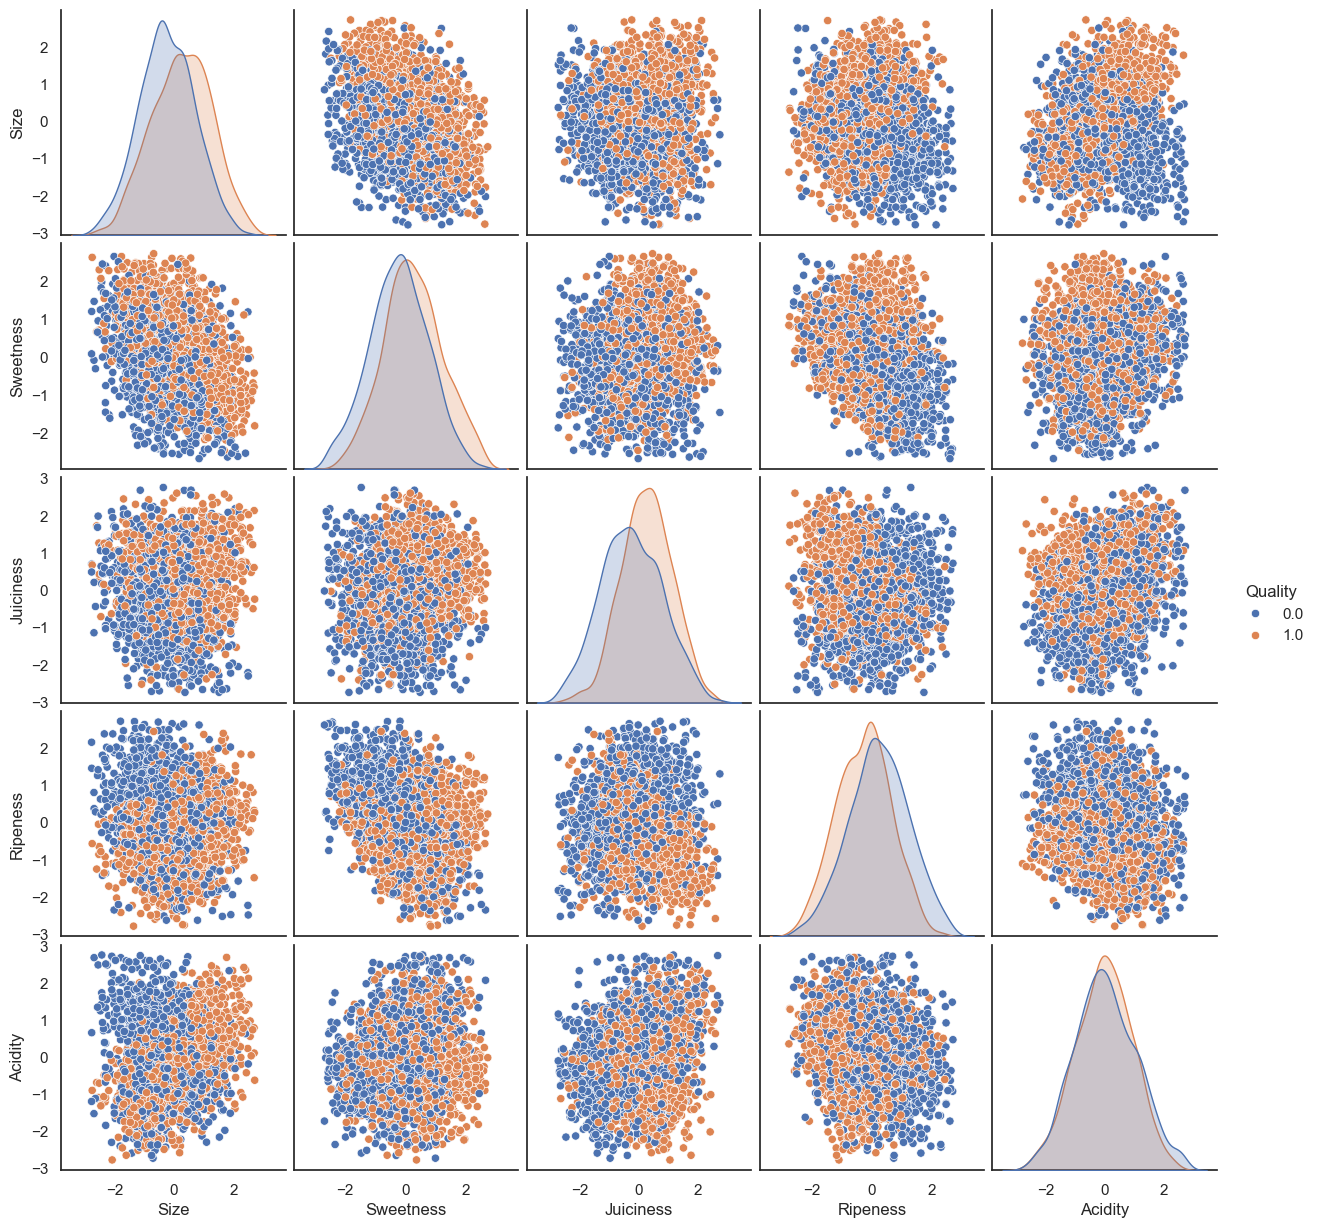

In [41]:
sns.pairplot(data1,hue="Quality")

In [42]:
import pandas as pd

# Assuming rfecv is your RFECV object
cv_results = pd.DataFrame(rfecv.cv_results_)
print(cv_results.columns)


Index(['mean_test_score', 'std_test_score', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'n_features'],
      dtype='object')


In [43]:
print(cv_results.head())


   mean_test_score  std_test_score  split0_test_score  split1_test_score  \
0         0.588504        0.009069           0.587459           0.584158   
1         0.690214        0.015929           0.711221           0.696370   
2         0.710690        0.021317           0.750825           0.702970   
3         0.732160        0.012190           0.750825           0.740924   
4         0.736781        0.013278           0.750825           0.754125   

   split2_test_score  split3_test_score  split4_test_score  n_features  
0           0.602310           0.593388           0.575207           1  
1           0.694719           0.662810           0.685950           2  
2           0.709571           0.702479           0.687603           3  
3           0.722772           0.717355           0.728926           4  
4           0.731023           0.720661           0.727273           5  


# Model_selection

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.ensemble import  BaggingClassifier
from sklearn.model_selection import  RandomizedSearchCV

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import  make_pipeline,Pipeline

In [45]:
from sklearn.metrics import precision_score,recall_score,classification_report,confusion_matrix,accuracy_score,f1_score,roc_auc_score

In [46]:
x_test1 = x_test1[selected_feature]

Given Dataset is of small size and does not occupy large memory based on that aplicable algorithms for classification are : 
1. Logistic Regression
2. K-nn classification
3. SVM classification
4. Decision tree
5. RandomForest
6. Gradient Boosting Machines
6. Adaboost
7. XGboost
8. LightGbm
9. CatBoost
10. Naive Bayes
11. SGD
12. Ridge Classifier
13. Bagging Classifier

In [47]:
models = {
    "logistic_regression" : LogisticRegression(),
    "SVC_kernel" : SVC(kernel="rbf",gamma="scale"),
    "SVC_kernel_poly" : SVC(kernel="poly",gamma="scale",degree=3,coef0=1),
    "SVC_kernel_sigmoid" : SVC(kernel="sigmoid",gamma="scale",coef0= 1),
    "KNN_classification" : KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier(),
    "SGDClassifier": SGDClassifier(),
    "RidgeClassifier": RidgeClassifier(),
    "BaggingClassifier": BaggingClassifier()
}
Accuracy = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(x_train2,y_train1)

    y_train_pred = model.predict(x_train2)
    y_test_pred = model.predict(x_test1)

    print(f"\033[1m{i+1}. {list(models.keys())[i]}\033[0m")
    print(f"Training Accuracy : {model.score(x_train2,y_train1)}")
    print(f"Testing Accuracy : {model.score(x_test1,y_test1)}")
    print(f"Training Confusion Matrix : \n{confusion_matrix(y_train1,y_train_pred)}")
    print(f"Testing Confusion Matrix : \n{confusion_matrix(y_test1,y_test_pred)}")
    print(f"Training Classification Report :\n {classification_report(y_train1,y_train_pred)}")
    print("----------------------------------------------------------------")
    print(f"Testing Classification Report : \n{classification_report(y_test1,y_test_pred)}")
    print("----------------------------------------------------------------")
    print(f"Precision Report : {accuracy_score(y_train1,y_train_pred)}")
    print("================================================================")

    Accuracy[list(models.keys())[i]] = accuracy_score(y_test1,y_test_pred)

for i in Accuracy:
    print(f"{i} : {Accuracy[i]}")   

    




               

1. logistic_regression
Training Accuracy : 0.7305151915455746
Testing Accuracy : 0.7295514511873351
Training Confusion Matrix : 
[[1097  426]
 [ 390 1115]]
Testing Confusion Matrix : 
[[298 104]
 [101 255]]
Training Classification Report :
               precision    recall  f1-score   support

         0.0       0.74      0.72      0.73      1523
         1.0       0.72      0.74      0.73      1505

    accuracy                           0.73      3028
   macro avg       0.73      0.73      0.73      3028
weighted avg       0.73      0.73      0.73      3028

----------------------------------------------------------------
Testing Classification Report : 
              precision    recall  f1-score   support

         0.0       0.75      0.74      0.74       402
         1.0       0.71      0.72      0.71       356

    accuracy                           0.73       758
   macro avg       0.73      0.73      0.73       758
weighted avg       0.73      0.73      0.73       758

-------

Here 6 algorithms perform well than others:
1. SVC_kernel_poly 
2. KNN_classification
3. RandomForestClassifier
4. GradientBoostingClassifier
5. BaggingClassifier
6. SVC_kernel

In [72]:
models = {
    "SVC_kernel" : SVC(gamma="scale",tol= 0.001,probability = False,kernel = 'poly',degree = np.int64(),coef0 = np.float64(0.30000000000000004), C = np.float64(0.4))
    #"SVC_kernel_poly" : SVC(kernel="poly",gamma="scale",degree=4,coef0=1),
    #"KNN_classification" : KNeighborsClassifier(),
    #RandomForestClassifier": RandomForestClassifier(),
    #"GradientBoostingClassifier": GradientBoostingClassifier(),
    #"BaggingClassifier": BaggingClassifier()
}
Accuracy = {}
for i in range(len(list(models))):
    model = list(models.values())[i]
    poly = PolynomialFeatures(degree=3)
    model = make_pipeline(poly, model)
    model.fit(x_train2,y_train1)

    y_train_pred = model.predict(x_train2)
    y_test_pred = model.predict(x_test1)

    print(f"\033[1m{i+1}. {list(models.keys())[i]}\033[0m")
    print(f"Training Accuracy : {model.score(x_train2,y_train1)}")
    print(f"Testing Accuracy : {model.score(x_test1,y_test1)}")
    print(f"Training Confusion Matrix : \n{confusion_matrix(y_train1,y_train_pred)}")
    print(f"Testing Confusion Matrix : \n{confusion_matrix(y_test1,y_test_pred)}")
    print(f"Training Classification Report :\n {classification_report(y_train1,y_train_pred)}")
    print("----------------------------------------------------------------")
    print(f"Testing Classification Report : \n{classification_report(y_test1,y_test_pred)}")
    print("----------------------------------------------------------------")
    print(f"Precision Report : {accuracy_score(y_train1,y_train_pred)}")
    print("================================================================")

    Accuracy[list(models.keys())[i]] = accuracy_score(y_test1,y_test_pred)

for i in Accuracy:
    print(f"{i} : {Accuracy[i]}")   

1. SVC_kernel
Training Accuracy : 0.8315719947159842
Testing Accuracy : 0.8126649076517151
Training Confusion Matrix : 
[[1123  400]
 [ 110 1395]]
Testing Confusion Matrix : 
[[295 107]
 [ 35 321]]
Training Classification Report :
               precision    recall  f1-score   support

         0.0       0.91      0.74      0.81      1523
         1.0       0.78      0.93      0.85      1505

    accuracy                           0.83      3028
   macro avg       0.84      0.83      0.83      3028
weighted avg       0.84      0.83      0.83      3028

----------------------------------------------------------------
Testing Classification Report : 
              precision    recall  f1-score   support

         0.0       0.89      0.73      0.81       402
         1.0       0.75      0.90      0.82       356

    accuracy                           0.81       758
   macro avg       0.82      0.82      0.81       758
weighted avg       0.83      0.81      0.81       758

----------------

Now lets consider one model at a time

In [49]:
print(np.arange(0, 2, 0.1))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9]


In [67]:
# Define pipeline and hyperparameter distributions
pipeline = Pipeline([
    ('poly',PolynomialFeatures()),
    ('svc', SVC()),
    
])
SVC_kernel_param = {
    'poly__degree' : np.arange(1, 5),
    'svc__C' : np.arange(0,1,0.1),
    'svc__kernel': ['linear', 'poly', 'rbf','sigmoid'],
    'svc__degree': np.arange(1, 5),
    'svc__gamma': [np.logspace(-4, 4, 100),'scale'],
    'svc__coef0': np.arange(0,1,0.1),
    'svc__probability': [True, False],
    'svc__tol': [1e-3, 1e-2, 1e-1],
    
}


# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=SVC_kernel_param,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit to the data
random_search.fit(x_train2, y_train1)

# Best parameters and score
print("Best parameters found: ", random_search.best_params_)
print("Best cross-validation score: ", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters found:  {'svc__tol': 0.1, 'svc__probability': False, 'svc__kernel': 'linear', 'svc__gamma': 'scale', 'svc__degree': np.int64(3), 'svc__coef0': np.float64(0.6000000000000001), 'svc__C': np.float64(0.4), 'poly__degree': np.int64(4)}
Best cross-validation score:  0.8500662793552083


In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error

def select_models(X, y, interpretability='moderate'):
    # Determine if the problem is classification or regression
    if y.nunique() <= 10:
        problem_type = 'classification'
    else:
        problem_type = 'regression'

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    models = []
    if problem_type == 'classification':
        models = [
            ('Logistic Regression', LogisticRegression(max_iter=1000)),
            ('Decision Tree', DecisionTreeClassifier()),
            ('Random Forest', RandomForestClassifier()),
            ('Gradient Boosting', GradientBoostingClassifier()),
            ('SVM', SVC()),
            ('KNN', KNeighborsClassifier()),
            ('Naive Bayes', GaussianNB())
        ]
    else:
        models = [
            ('Linear Regression', LinearRegression()),
            ('Ridge Regression', Ridge()),
            ('Lasso Regression', Lasso()),
            ('Elastic Net Regression', ElasticNet()),
            ('Decision Tree Regressor', DecisionTreeRegressor()),
            ('Random Forest Regressor', RandomForestRegressor()),
            ('Gradient Boosting Regressor', GradientBoostingRegressor()),
            ('SVR', SVR()),
            ('KNN Regressor', KNeighborsRegressor())
        ]
    
    selected_models = []

    for name, model in models:
        model.fit(X_train, y_train)
        if problem_type == 'classification':
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            print(f'{name} Accuracy: {accuracy}')
        else:
            y_pred = model.predict(X_test)
            mse = mean_squared_error(y_test, y_pred)
            print(f'{name} Mean Squared Error: {mse}')

        # Select models based on interpretability
        if interpretability == 'high' and name in ['Logistic Regression', 'Linear Regression', 'Decision Tree']:
            selected_models.append(model)
        elif interpretability == 'moderate' and name in ['Random Forest', 'Gradient Boosting', 'Ridge Regression', 'Lasso Regression', 'Elastic Net Regression']:
            selected_models.append(model)
        elif interpretability == 'low' and name in ['Neural Networks', 'SVM', 'SVR']:
            selected_models.append(model)
    
    return selected_models



In [52]:
print(len(x_train2))

3028


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error

def select_model(X, y, interpretability='moderate'):
    # Determine problem type
    problem_type = 'classification' if len(y.unique()) <= 10 else 'regression'
    
    # Determine dataset size
    dataset_size = len(X)
    
    # Determine dataset dimensionality
    dataset_dimensionality = X.shape[1]
    
    # Select appropriate models based on dataset size and dimensionality
    if dataset_size <= 1000:
        if dataset_dimensionality <= 50:
            if interpretability == 'high':
                return LogisticRegression(), LinearRegression(), DecisionTreeClassifier()
            elif interpretability == 'moderate':
                return RandomForestClassifier(), GradientBoostingClassifier(), Ridge(), Lasso()
            elif interpretability == 'low':
                return SVC(), KNeighborsClassifier()
        else:
            if interpretability == 'high':
                return LogisticRegression(), LinearRegression(), DecisionTreeClassifier()
            elif interpretability == 'moderate':
                return RandomForestClassifier(), GradientBoostingClassifier(), Ridge(), Lasso()
            elif interpretability == 'low':
                return SVC(), KNeighborsClassifier()
    else:
        if interpretability == 'high':
            return DecisionTreeClassifier()
        elif interpretability == 'moderate':
            return RandomForestClassifier(), GradientBoostingClassifier()
        elif interpretability == 'low':
            return SVC()



In [54]:
select_models(x_train2,y_train1)

Logistic Regression Accuracy: 0.7574257425742574
Decision Tree Accuracy: 0.7607260726072608
Random Forest Accuracy: 0.8481848184818482
Gradient Boosting Accuracy: 0.834983498349835
SVM Accuracy: 0.8481848184818482
KNN Accuracy: 0.8382838283828383
Naive Bayes Accuracy: 0.7623762376237624


[RandomForestClassifier(), GradientBoostingClassifier()]

In [55]:
select_model(x_train2,y_train1)

(RandomForestClassifier(), GradientBoostingClassifier())